In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from typing import Callable
import numpy.polynomial.legendre as legendre
from genquad import *

In [17]:
eps_disc = 1e-1
eps_quad = 100*eps_disc
# I = Interval(1e-6,1e-1)
# function_family = FunctionFamily(I, [lambda x: x**(-1.0),lambda x: x])
I = Interval(-1.0,1.0)
function_family = example_problem(I, 100, 100)

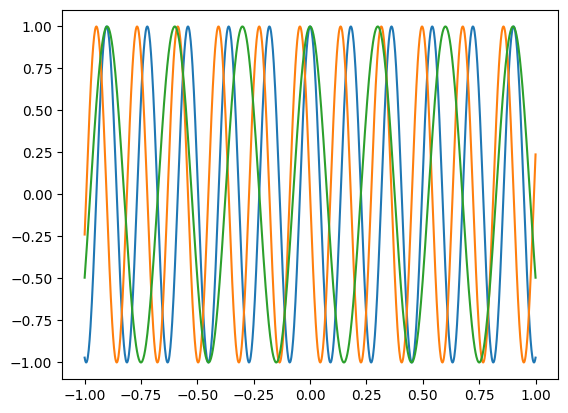

In [18]:
xx = np.linspace(I.a,I.b,1000)
for phi in function_family.functions[:min(len(function_family.functions),3)]:
    plt.plot(xx,phi(xx))

[-1.0, -0.5, 0.0, 0.5, 1.0]


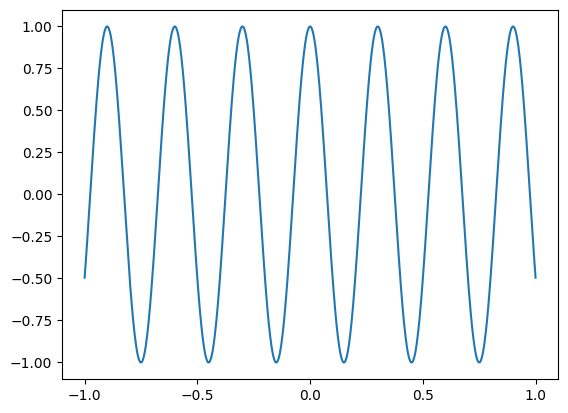

In [19]:
x, w, endpoints = adaptive_discretization(function_family, precision=eps_disc, k=30, verbose=False)
U = compress_sequence_of_functions(function_family, x, w, precision=eps_quad )
plt.figure();
plt.plot(xx,phi(xx));
plt.xticks(endpoints);
print(endpoints)

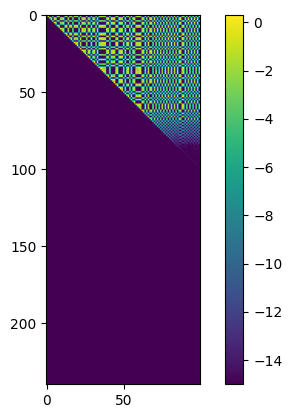

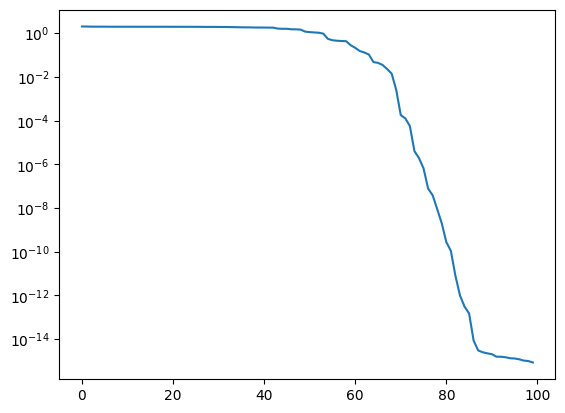

In [26]:
A = np.column_stack([phi(x)*np.sqrt(w) for phi in function_family.functions])
Q,R,perm = sp.linalg.qr(A, pivoting=True)
sp.linalg.norm(A[:, perm] - Q.dot(R), 2)
sp.linalg.norm(Q.dot(Q.T) - np.eye(len(x)))

plt.figure()
plt.imshow(np.log10(1e-15+np.abs(R)))
plt.colorbar()
plt.figure()
plt.semilogy(np.abs(np.diag(R)))

In [21]:
print(A.shape)
print(A)

(240, 100)
[[-0.04379432 -0.01043407 -0.02213753 ... -0.01795983  0.04413945
   0.0088612 ]
 [-0.06721778 -0.01394632 -0.03269704 ... -0.02314123  0.06770349
   0.0113564 ]
 [-0.08497457 -0.01300974 -0.03852917 ... -0.01912398  0.08545609
   0.00933745]
 ...
 [-0.08497457  0.01300974 -0.03852917 ...  0.01912398  0.08545609
  -0.00933745]
 [-0.06721778  0.01394632 -0.03269704 ...  0.02314123  0.06770349
  -0.0113564 ]
 [-0.04379432  0.01043407 -0.02213753 ...  0.01795983  0.04413945
  -0.0088612 ]]
